<a href="https://colab.research.google.com/github/abulmeez/ML_Projects/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 1: Linear Regression Model

In [ ]:
!pip install ucimlrepo
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo

In [ ]:
infrared_thermography_temperature = fetch_ucirepo(id=925)
#creating pandas dataframes containing our data
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets['aveOralM']
#printing heads to ensure everything is smooth
print(X.head())
print(y.head())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.5775  33.4775   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0325  34.0550   
2     0.8625    35.6525    35.5175      34.2775  ...  34.9000  34.8275   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4400  34.4225   
4     0.8950    35.5450    35.6650      34.9100  ...  35.0900  35.1600   

   T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  \
0  33.3725  33.4925  33.0025    34.53

In [ ]:
#null checks for missing data
print(X.isnull().sum())
print(y.isnull().sum())

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64
0


In [ ]:
#replacing null values with the mean of the values, our data was missing distance so we just applied the mean
X['Distance'] = X['Distance'].fillna(X['Distance'].mean())
print(X.isnull().sum())

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


<ipython-input-4-925c295e42e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Distance'] = X['Distance'].fillna(X['Distance'].mean())


In [ ]:

onehotencoder = OneHotEncoder(sparse_output=False, drop='first')
#applying hot encoder to these specific categories
X_categorical_encoded = onehotencoder.fit_transform(X[['Gender', 'Age', 'Ethnicity']])


categorical_feature_names = onehotencoder.get_feature_names_out(['Gender', 'Age', 'Ethnicity'])
X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)
#removing original columns to be replaced with the new codes representing said data
X = X.drop(columns=['Gender', 'Age', 'Ethnicity'])

#adding the new columns to our original dataset
X_encoded = pd.concat([X.reset_index(drop=True), X_categorical_encoded], axis=1)

print(X_encoded.head())

   T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0   24.0      28.0       0.8     0.7025    35.0300    35.3775      34.4000   
1   24.0      26.0       0.8     0.7800    34.5500    34.5200      33.9300   
2   24.0      26.0       0.8     0.8625    35.6525    35.5175      34.2775   
3   24.0      27.0       0.8     0.9300    35.2225    35.6125      34.3850   
4   24.0      27.0       0.8     0.8950    35.5450    35.6650      34.9100   

   aveAllL13_1    T_RC1  T_RC_Dry1  ...  Age_26-30  Age_31-40  Age_41-50  \
0      34.9175  34.9850    34.9850  ...        0.0        0.0        1.0   
1      34.2250  34.7100    34.6325  ...        0.0        1.0        0.0   
2      34.8000  35.6850    35.6675  ...        0.0        0.0        0.0   
3      35.2475  35.2075    35.2000  ...        0.0        0.0        0.0   
4      35.3675  35.6025    35.4750  ...        0.0        0.0        0.0   

   Age_51-60  Age_>60  Ethnicity_Asian  Ethnicity_Black or African-America

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)
print(X_scaled.head())

      T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0 -0.086392 -0.055341  0.028626  -0.734385  -0.985950  -0.425802    -0.680080   
1 -0.086392 -0.208419  0.028626  -0.520538  -1.821305  -1.986339    -1.334438   
2 -0.086392 -0.208419  0.028626  -0.292895   0.097401  -0.171020    -0.850631   
3 -0.086392 -0.131880  0.028626  -0.106642  -0.650938   0.001867    -0.700964   
4 -0.086392 -0.131880  0.028626  -0.203217  -0.089684   0.097411     0.029969   

   aveAllL13_1     T_RC1  T_RC_Dry1  T_RC_Wet1  T_RC_Max1     T_LC1  \
0    -0.148131 -1.219093  -1.058249  -1.380382  -1.187846 -0.560823   
1    -1.241220 -1.715819  -1.677758  -1.595842  -1.711952 -1.998234   
2    -0.333601  0.045300   0.141225   0.119049   0.050129 -0.255778   
3     0.372763 -0.817197  -0.680393  -0.755985  -0.839948 -0.084768   
4     0.562180 -0.103718  -0.197088   0.039901  -0.089933 -0.001574   

   T_LC_Dry1  T_LC_Wet1  T_LC_Max1      RCC1      LCC1  canthiMax1  \
0  -0.501248  -1

Basic statistics for target column 'aveOralM':
count    1020.000000
mean       37.028382
std         0.509502
min        35.540000
25%        36.777500
50%        36.940000
75%        37.140000
max        40.340000
Name: aveOralM, dtype: float64

Basic statistics for numerical features in Dataset 1:
             T_atm     Humidity     Distance    T_offset1    Max1R13_1  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean     24.115392    28.723039     0.729784     0.968648    35.596533   
std       1.336338    13.071627     2.454074     0.362587     0.574888   
min      20.200000     9.900000     0.540000    -0.590000    33.897500   
25%      23.400000    17.600000     0.600000     0.772500    35.247500   
50%      24.000000    26.300000     0.620000     0.940000    35.548750   
75%      24.700000    36.200000     0.700000     1.140000    35.872500   
max      29.100000    61.200000    79.000000     2.875000    38.405000   

         Max1L13_1  aveAllR13_1 

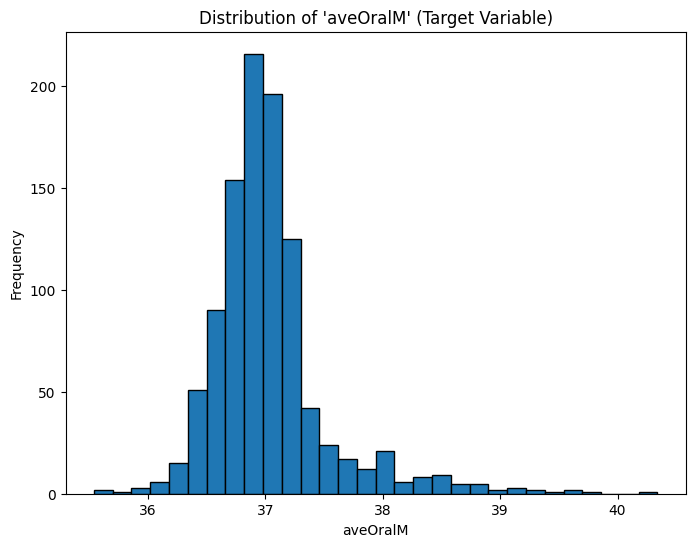

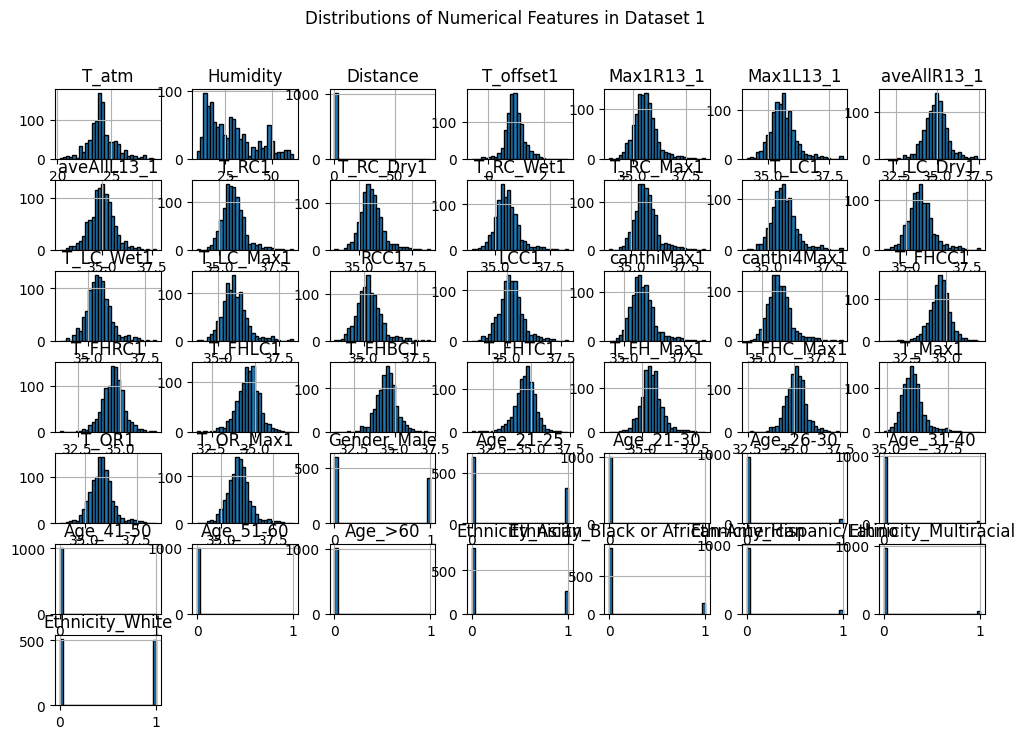

In [ ]:
# Check if the dataset is balanced
print("Basic statistics for target column 'aveOralM':")
print(y.describe())

# Get basic statistics for numerical features
print("\nBasic statistics for numerical features in Dataset 1:")
print(X_encoded.describe())

# Visualizing the distribution of target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, edgecolor='k')
plt.title("Distribution of 'aveOralM' (Target Variable)")
plt.xlabel('aveOralM')
plt.ylabel('Frequency')
plt.show()

# Visualizing distributions of numerical features
X_encoded.hist(figsize=(12, 8), bins=30, edgecolor='k')
plt.suptitle('Distributions of Numerical Features in Dataset 1')
plt.show()

In [ ]:
def train_test_split(X, y, test_size=0.2, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)  # Set seed for reproducibility

    # Shuffle the indices
    indices = np.random.permutation(X.shape[0])
    test_size = int(test_size * X.shape[0])

    # Split indices for training and test
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    # Split the data
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_seed=42)


In [ ]:
# Linear Regression model implementation
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        self.w = None  # To store the weights (parameters)

    def fit(self, X, y):
        if X.ndim == 1:
            X = X[:, None]  # Add a dimension if there's only one feature

        N = X.shape[0]  # Number of samples

        # Add bias term (a column of ones) if specified
        if self.add_bias:
            X = np.column_stack([X, np.ones(N)])

        # Compute weights using least squares method
        self.w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)  # Return weights for least square solution

        return self  # Return the model itself

    def predict(self, X):
        if X.ndim == 1:
            X = X[:, None]  # Add a dimension if there's only one feature

        N = X.shape[0]  # Number of samples

        # Add bias term (a column of ones) if specified
        if self.add_bias:
            X = np.column_stack([X, np.ones(N)])

        # Predict the y values
        yh = X @ self.w

        return yh

# Initialize and train the Linear Regression model
lr = LinearRegression(add_bias=True)
lr.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Compute Mean Squared Error (MSE) for training and testing sets
mse_train = np.mean((y_pred_train - y_train) ** 2)
mse_test = np.mean((y_pred_test - y_test) ** 2)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

Training MSE: 0.0644644262765009
Test MSE: 0.05404794333725851


In [ ]:
#printing weights of the feature for analysis
print("Feature Weights (Linear Regression):")
if lr.add_bias:
    feature_names = X_train.columns.tolist() + ['Bias']
else:
    feature_names = X_train.columns.tolist()

for name, weight in zip(feature_names, lr.w):
    print(f"{name}: {weight}")

Feature Weights (Linear Regression):
T_atm: -0.08306760954539409
Humidity: 0.003712783525921498
Distance: 0.001981003529911542
T_offset1: 0.020105243710655363
Max1R13_1: -0.19346136921988677
Max1L13_1: -0.11341704479529228
aveAllR13_1: -0.024048320773037767
aveAllL13_1: -0.044119347220852076
T_RC1: -0.18867303584633507
T_RC_Dry1: 0.15167597083263062
T_RC_Wet1: 0.0026844095480810922
T_RC_Max1: 0.3184347365383824
T_LC1: 0.30614230665109343
T_LC_Dry1: -0.061523376386419366
T_LC_Wet1: -0.07455906160737849
T_LC_Max1: -0.06010179449028822
RCC1: 0.03987184504254409
LCC1: 0.0990904938164134
canthiMax1: -0.4246782995946947
canthi4Max1: 0.3588329543766943
T_FHCC1: -0.0770789981682582
T_FHRC1: -0.014387735490647379
T_FHLC1: -0.0638976521846424
T_FHBC1: 0.06247475598091419
T_FHTC1: -0.004665571810623238
T_FH_Max1: 0.06172891093201651
T_FHC_Max1: 0.05731547264036118
T_Max1: 0.298308672828278
T_OR1: 0.0772828658717449
T_OR_Max1: -0.01720147973314451
Gender_Male: -0.025243274991632488
Age_21-25: 0.00

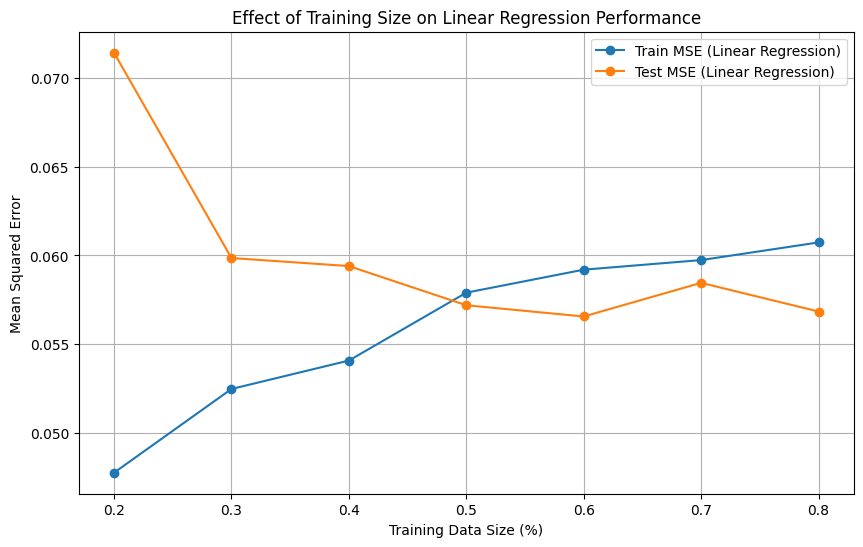

In [ ]:
def evaluate_model_on_subsets(model_class, X_train, y_train, X_test, y_test):
    train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    train_errors = []
    test_errors = []

    for train_size in train_sizes:
        # Sample the subset of the training data
        subset_size = int(train_size * X_train.shape[0])
        X_train_subset = X_train.iloc[:subset_size]
        y_train_subset = y_train.iloc[:subset_size]

        # Initialize the model
        model = model_class(add_bias=True)

        # Train the model
        model.fit(X_train_subset.to_numpy(), y_train_subset.to_numpy())

        # Make predictions
        y_train_pred = model.predict(X_train_subset.to_numpy())
        y_test_pred = model.predict(X_test.to_numpy())

        # Calculate MSE for training and test sets
        train_mse = np.mean((y_train_pred - y_train_subset) ** 2)
        test_mse = np.mean((y_test_pred - y_test) ** 2)

        # Store errors for plotting
        train_errors.append(train_mse)
        test_errors.append(test_mse)

    return train_sizes, train_errors, test_errors


# Evaluate on Linear Regression
train_sizes, train_errors_lr, test_errors_lr = evaluate_model_on_subsets(
    LinearRegression, X_train, y_train, X_test, y_test)

# Plot results
plt.figure(figsize=(10, 6))

# Linear Regression plot
plt.plot(train_sizes, train_errors_lr, label='Train MSE (Linear Regression)', marker='o')
plt.plot(train_sizes, test_errors_lr, label='Test MSE (Linear Regression)', marker='o')

plt.xlabel('Training Data Size (%)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Training Size on Linear Regression Performance')
plt.legend()
plt.grid(True)
plt.show()

Mini Batch Linear Regression

In [ ]:
class MiniBatchLinearRegression:
    def __init__(self, learning_rate=0.01, batch_size=128, epochs=100, add_bias=True, convergence_threshold=1e-4):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.add_bias = add_bias
        self.w = None  # To store the weights (parameters)
        self.convergence_threshold = convergence_threshold

    def _add_bias(self, X):
        N = X.shape[0]
        return np.column_stack([X, np.ones(N)])

    def fit(self, X, y):
        if X.ndim == 1:
            X = X[:, None]  # Add a dimension if there's only one feature

        N, d = X.shape

        # Add bias term (a column of ones) if specified
        if self.add_bias:
            X = self._add_bias(X)

        # Initialize weights randomly
        self.w = np.random.randn(X.shape[1])

        mse_history = []
        convergence_speed = self.epochs  # Assume no convergence initially

        # Iterate over the dataset for the given number of epochs
        for epoch in range(self.epochs):
            indices = np.random.permutation(N)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Mini-batch training
            for start_idx in range(0, N, self.batch_size):
                end_idx = min(start_idx + self.batch_size, N)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                # Compute predictions
                y_pred = X_batch @ self.w

                # Compute gradient of the loss (MSE) with respect to the weights
                gradient = -(2 / X_batch.shape[0]) * (X_batch.T @ (y_batch - y_pred))

                # Update weights
                self.w -= self.learning_rate * gradient

            # Compute MSE at each epoch
            mse = np.mean((X @ self.w - y) ** 2)
            mse_history.append(mse)

            # Check for convergence (when MSE stops decreasing significantly)
            if epoch > 0 and abs(mse_history[-1] - mse_history[-2]) < self.convergence_threshold:
                convergence_speed = epoch
                break  # Stop early if convergence is reached

        return self, mse_history, convergence_speed  # Return the model, MSE history, and convergence speed

    def predict(self, X):
        if X.ndim == 1:
            X = X[:, None]  # Add a dimension if there's only one feature

        # Add bias term (a column of ones) if specified
        if self.add_bias:
            X = self._add_bias(X)

        # Predict the y values
        return X @ self.w

# Function to compare different batch sizes and print convergence speed
def compare_batch_sizes(X_train, y_train, X_test, y_test, batch_sizes, learning_rate=0.01, epochs=100):
    results = {}

    for batch_size in batch_sizes:
        # Initialize and train the Mini-Batch Linear Regression model
        mb_lr = MiniBatchLinearRegression(learning_rate=learning_rate, batch_size=batch_size, epochs=epochs, add_bias=True)
        mb_lr, mse_history, convergence_speed = mb_lr.fit(X_train.to_numpy(), y_train.to_numpy())

        # Make predictions on test data
        y_pred_test = mb_lr.predict(X_test.to_numpy())
        test_mse = np.mean((y_pred_test - y_test) ** 2)

        # Store the test performance, convergence speed, and convergence history
        results[batch_size] = {'test_mse': test_mse, 'mse_history': mse_history, 'convergence_speed': convergence_speed}

    return results

# Define the batch sizes to try
batch_sizes = [8, 16, 32, 64, 128]
results = compare_batch_sizes(X_train, y_train, X_test, y_test, batch_sizes)

# Print final test MSE and convergence speed for each batch size
for batch_size, result in results.items():
    print(f'Batch Size: {batch_size}, Test MSE: {result["test_mse"]}, Convergence Speed: {result["convergence_speed"]} epochs')

Batch Size: 8, Test MSE: 2.817774495460482e+41, Convergence Speed: 100 epochs
Batch Size: 16, Test MSE: 0.06334610017939553, Convergence Speed: 62 epochs
Batch Size: 32, Test MSE: 0.08777446428840106, Convergence Speed: 89 epochs
Batch Size: 64, Test MSE: 0.18569565022188486, Convergence Speed: 64 epochs
Batch Size: 128, Test MSE: 0.3515526265498198, Convergence Speed: 100 epochs


In [ ]:
# Function to compare different learning rates
def compare_learning_rates(X_train, y_train, X_test, y_test, learning_rates, batch_size=32, epochs=1000):
    results = {}

    for lr in learning_rates:
        # Initialize and train the Mini-Batch Linear Regression model
        mb_lr = MiniBatchLinearRegression(learning_rate=lr, batch_size=batch_size, epochs=epochs, add_bias=True)
        mb_lr, mse_history, convergence_speed = mb_lr.fit(X_train.to_numpy(), y_train.to_numpy())

        # Make predictions on test data
        y_pred_test = mb_lr.predict(X_test.to_numpy())
        test_mse = np.mean((y_pred_test - y_test) ** 2)

        # Store the test performance, convergence speed, and MSE history
        results[lr] = {'test_mse': test_mse, 'convergence_speed': convergence_speed}

    return results

# Define the learning rates to try
learning_rates = [0.01, 0.001, 0.0001]

# Compare performance with different learning rates
results_lr = compare_learning_rates(X_train, y_train, X_test, y_test, learning_rates, batch_size=32, epochs=1000)

# Print final test MSE and convergence speed for each learning rate
for lr, result in results_lr.items():
    print(f'Learning Rate: {lr}, Test MSE: {result["test_mse"]}, Convergence Speed: {result["convergence_speed"]} epochs')


Learning Rate: 0.01, Test MSE: 0.07275870878309366, Convergence Speed: 105 epochs
Learning Rate: 0.001, Test MSE: 0.19604428085176465, Convergence Speed: 289 epochs
Learning Rate: 0.0001, Test MSE: 0.6806165384373148, Convergence Speed: 1000 epochs


DataSet 2: Logistic Regression Model




In [ ]:
def train_test_split(X, y, test_size=0.2, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)  # Set seed for reproducibility

    # Shuffle the indices
    indices = np.random.permutation(X.shape[0])
    test_size = int(test_size * X.shape[0])

    # Split indices for training and test
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    # Split the data
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
# Creating pandas dataframes with data from the website
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

X2 = cdc_diabetes_health_indicators.data.features
y2 = cdc_diabetes_health_indicators.data.targets['Diabetes_binary']

In [ ]:
print(X2.head())
print(y2.head())

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0             0       0        1                  0              1   
1             1       0        0                  0              0   
2             0       1        0                  0              1   
3             1       1        1                  0              1   
4             1       1        1                  0              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18     

In [ ]:
# Checking for missing values
print(X2.isnull().sum())
print(y2.isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
0


In [ ]:
# Scaling the data
scaler = StandardScaler()
X2_scaled = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_scaled, y2, test_size=0.2, random_seed=42)

Distribution of the target variable (Diabetes_binary):
Diabetes_binary
0    86.066698
1    13.933302
Name: proportion, dtype: float64

Basic statistics for numerical features in Dataset 2:
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571  

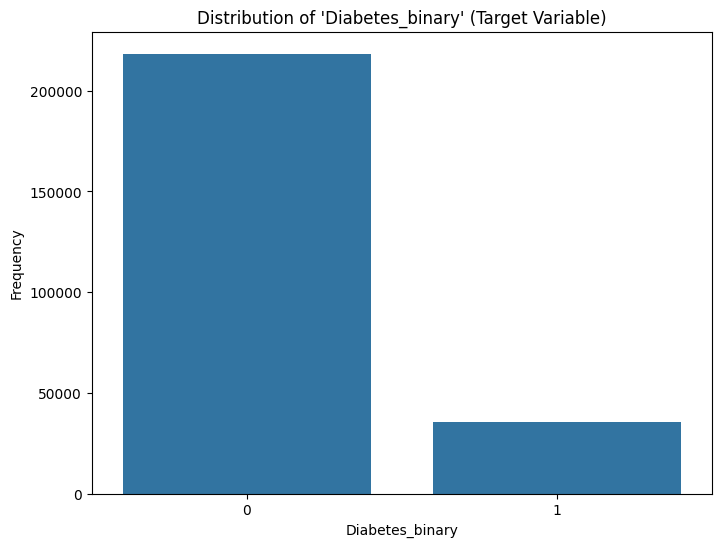

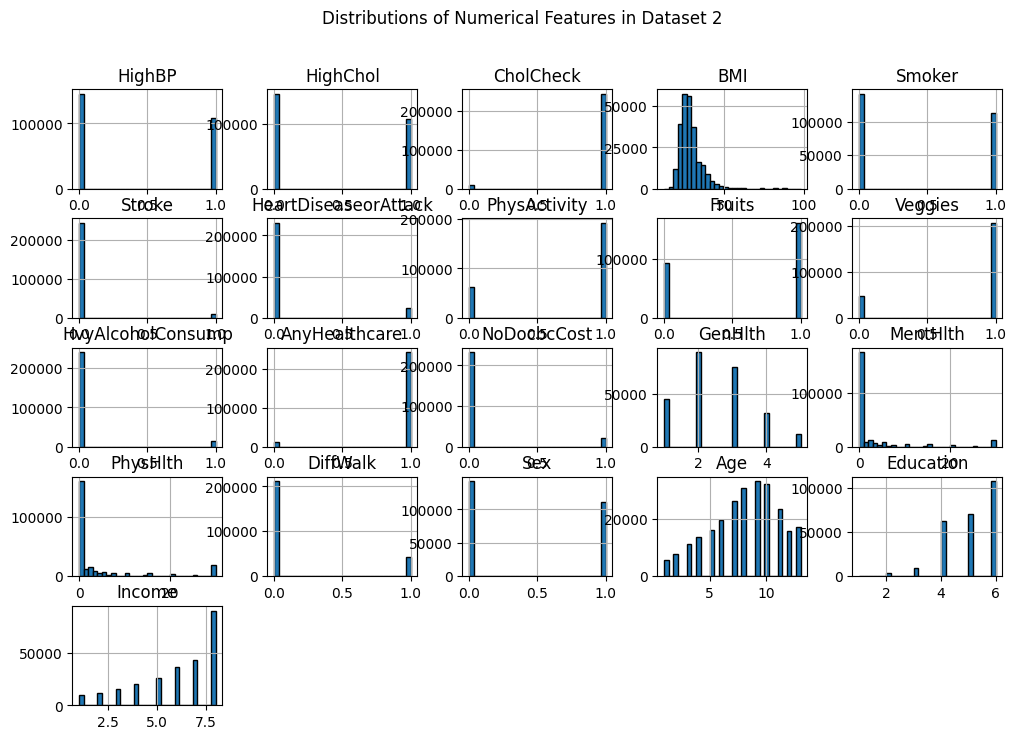

In [ ]:
import seaborn as sns

# Check if the target variable (binary classification) is balanced
print("Distribution of the target variable (Diabetes_binary):")
print(y2.value_counts(normalize=True) * 100)

# Get basic statistics for numerical features
print("\nBasic statistics for numerical features in Dataset 2:")
print(X2.describe())

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y2)
plt.title("Distribution of 'Diabetes_binary' (Target Variable)")
plt.xlabel('Diabetes_binary')
plt.ylabel('Frequency')
plt.show()

# Visualizing distributions of numerical features
X2.hist(figsize=(12, 8), bins=30, edgecolor='k')
plt.suptitle('Distributions of Numerical Features in Dataset 2')
plt.show()


In [ ]:
# Logistic function
logistic = lambda z: 1./ (1 + np.exp(-z))

In [ ]:
# Cost function
def cost_fn(x, y, w):
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  # log1p avoids floating point inaccuracies
    return J


In [ ]:
# Gradient function
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # Predictions  size N
    grad = np.dot(x.T, yh - y) / N      # Divide by N because cost is mean over N points
    return grad

In [ ]:
# Logistic Regression Class
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        # Tolerance for norm of gradients
        self.max_iters = max_iters                    # Max number of iteration of gradient descent
        self.verbose = verbose

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # Gradient descent loop
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'Terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'The weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))            # Predict output
        return yh

In [ ]:
# Attach the gradient function to the class
LogisticRegression.gradient = gradient

In [ ]:
# Create an instance of the LogisticRegression class
log_reg_model = LogisticRegression(add_bias=True, learning_rate=0.1, epsilon=1e-4, max_iters=1e5, verbose=True)

# Train the model on the second dataset
log_reg_model.fit(X_train2.values, y_train2.values)  # Make sure to pass numpy arrays

# Make predictions on the test set
y_pred_probs = log_reg_model.predict(X_test2.values)

# Convert predicted probabilities to binary outcomes (threshold = 0.5)
y_pred_binary = (y_pred_probs >= 0.5).astype(int)

# Evaluate the model (calculate accuracy)
test_accuracy = np.mean(y_pred_binary == y_test2.values)
print(f"Test Accuracy: {test_accuracy}")


Terminated after 1889 iterations, with norm of the gradient equal to 9.984109652587544e-05
The weight found: [ 3.70758703e-01  2.77408624e-01  2.34133507e-01  4.01865339e-01
 -1.80081293e-03  2.80217383e-02  6.84724472e-02 -2.11827113e-02
 -2.13930766e-02 -1.42625572e-02 -1.69300039e-01  1.33981262e-02
  4.91305931e-03  5.65805007e-01 -2.69404188e-02 -6.47833262e-02
  5.40422887e-02  1.28075469e-01  3.75771490e-01 -2.92345134e-02
 -1.06375350e-01 -2.40361761e+00]
Test Accuracy: 0.865874329864396


In [ ]:
# Step 1: Get the feature names from the DataFrame
feature_names = X_train2.columns.tolist()

# Step 2: If bias was added, append 'Bias' to the feature list
if log_reg_model.add_bias:
    feature_names.append('Bias')

# Step 3: Map the weights to the corresponding feature names and print
print("Feature Weights:")
for feature, weight in zip(feature_names, log_reg_model.w):
    print(f'{feature}: {weight}')


Feature Weights:
HighBP: 0.35203191092400016
HighChol: 0.279624162414919
CholCheck: 0.2435167473193652
BMI: 0.4809304806931701
Smoker: -0.0040328174470064876
Stroke: 0.025282595169962598
HeartDiseaseorAttack: 0.09093346370346621
PhysActivity: -0.020458530569514556
Fruits: -0.029506378484972295
Veggies: -0.022080529722581524
HvyAlcoholConsump: -0.15816215566250477
AnyHealthcare: 0.013482625382980448
NoDocbcCost: 0.020540126778379093
GenHlth: 0.6113654412893195
MentHlth: -0.0300722768244041
PhysHlth: -0.06677714971661569
DiffWalk: 0.05413528739668466
Sex: 0.14224288635418184
Age: 0.45586137638423824
Education: -0.036004999991363536
Income: -0.11794860471527085
Bias: -0.6456219797293191


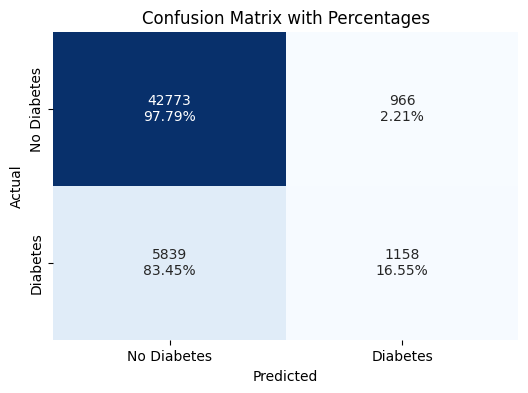

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_test2, y_pred_binary)

# Calculate percentages in the confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create labels for the confusion matrix (counts and percentages)
labels = np.asarray([f'{v1}\n{v2:.2f}%' for v1, v2 in zip(cm.flatten(), cm_percent.flatten())]).reshape(2,2)

# Plot the confusion matrix with percentages
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Percentages')
plt.show()


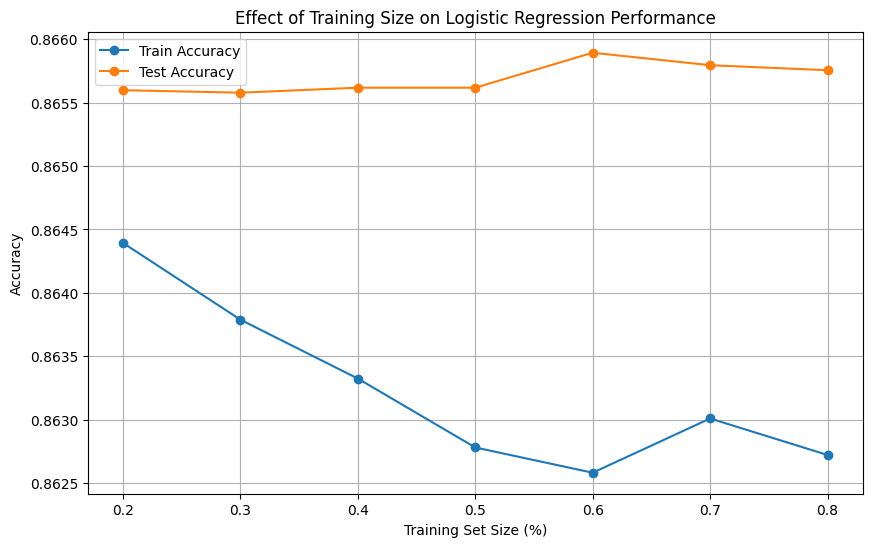

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate logistic regression on growing subsets of the training data
def evaluate_on_subsets(X_train, y_train, X_test, y_test, model_class, learning_rate=0.1, max_iters=1e5):
    train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Percentage of training data to use
    train_accuracies = []
    test_accuracies = []

    for train_size in train_sizes:
        # Sample the subset of the training data
        subset_size = int(train_size * X_train.shape[0])
        X_train_subset = X_train.iloc[:subset_size]
        y_train_subset = y_train.iloc[:subset_size]

        # Initialize the logistic regression model
        log_reg_model = model_class(add_bias=True, learning_rate=learning_rate, epsilon=1e-4, max_iters=max_iters, verbose=False)

        # Train the model on the subset
        log_reg_model.fit(X_train_subset.values, y_train_subset.values)

        # Evaluate accuracy on the training subset
        y_train_pred_probs = log_reg_model.predict(X_train_subset.values)
        y_train_pred_binary = (y_train_pred_probs >= 0.5).astype(int)
        train_accuracy = np.mean(y_train_pred_binary == y_train_subset.values)
        train_accuracies.append(train_accuracy)

        # Evaluate accuracy on the test set
        y_test_pred_probs = log_reg_model.predict(X_test.values)
        y_test_pred_binary = (y_test_pred_probs >= 0.5).astype(int)
        test_accuracy = np.mean(y_test_pred_binary == y_test.values)
        test_accuracies.append(test_accuracy)

    return train_sizes, train_accuracies, test_accuracies

# Call the function for both standard logistic regression and mini-batch logistic regression
train_sizes, train_accuracies, test_accuracies = evaluate_on_subsets(
    X_train2, y_train2, X_test2, y_test2, LogisticRegression, learning_rate=0.1, max_iters=1e5
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(train_sizes, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Effect of Training Size on Logistic Regression Performance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train2, y_train2)

In [ ]:
log_reg_model.fit(X_train_balanced.values, y_train_balanced.values)
y_pred_probs = log_reg_model.predict(X_test2.values)

# Convert predicted probabilities to binary outcomes (threshold = 0.5)
y_pred_binary = (y_pred_probs >= 0.5).astype(int)

# Step 5: Evaluate the model (calculate accuracy)
test_accuracy = np.mean(y_pred_binary == y_test2.values)
print(f"Test Accuracy after undersampling: {test_accuracy}")

Terminated after 943 iterations, with norm of the gradient equal to 9.978021621804215e-05
The weight found: [ 0.35203191  0.27962416  0.24351675  0.48093048 -0.00403282  0.0252826
  0.09093346 -0.02045853 -0.02950638 -0.02208053 -0.15816216  0.01348263
  0.02054013  0.61136544 -0.03007228 -0.06677715  0.05413529  0.14224289
  0.45586138 -0.036005   -0.1179486  -0.64562198]
Test Accuracy after undersampling: 0.7316895301166825


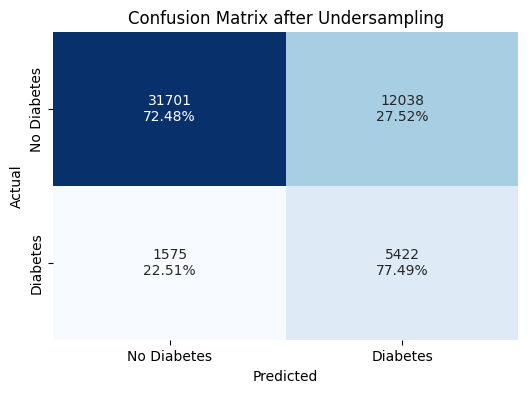

In [ ]:
cm = confusion_matrix(y_test2, y_pred_binary)

# Calculate percentages in the confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create labels for the confusion matrix (counts and percentages)
labels = np.asarray([f'{v1}\n{v2:.2f}%' for v1, v2 in zip(cm.flatten(), cm_percent.flatten())]).reshape(2,2)

# Plot the confusion matrix with percentages
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Undersampling')
plt.show()

Mini Batch Logistic Regression


Iteration 100: Gradient norm = 0.42013541598352916
Iteration 200: Gradient norm = 0.33234527776011175
Iteration 300: Gradient norm = 0.337286403512798
Iteration 400: Gradient norm = 0.2775949151138801
Iteration 500: Gradient norm = 0.26704992364078284
Iteration 600: Gradient norm = 0.16801846439391374
Iteration 700: Gradient norm = 0.32793355180564426
Iteration 800: Gradient norm = 0.34320894002474067
Iteration 900: Gradient norm = 0.2719242657513991
Iteration 1000: Gradient norm = 0.3421228147238973
Terminated after 1000 iterations, with norm of the gradient = 0.3421228147238973
Final weights: [ 3.47824498e-01  3.11041668e-01  2.47750539e-01  4.58669341e-01
 -5.79663398e-02  9.86381393e-03  4.87264319e-02  1.86941912e-02
 -5.33525797e-02 -5.29753081e-02 -1.66341586e-01  3.94901367e-02
  1.96574192e-03  6.17104448e-01 -1.88592653e-02 -4.64591675e-02
  6.95972478e-02  1.22491886e-01  3.24341213e-01  1.98392288e-02
 -7.24671213e-02 -2.41583598e+00]
Test Accuracy with Mini-Batch SGD: 0.86

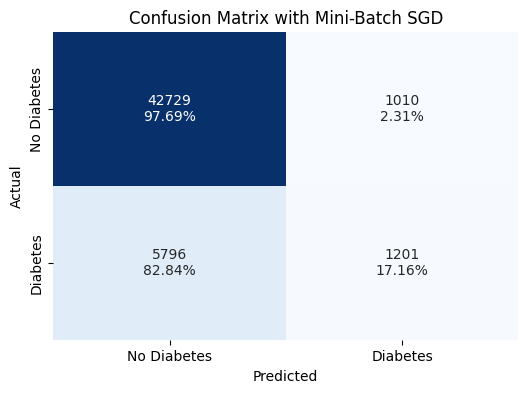

In [ ]:
class MiniBatchLogisticRegression:
    def __init__(self, add_bias=True, learning_rate=0.1, epsilon=1e-4, max_iters=1e5, batch_size=32, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        # Tolerance for norm of gradients
        self.max_iters = max_iters                    # Max number of iterations
        self.batch_size = batch_size                  # Mini-batch size
        self.verbose = verbose

    def _add_bias(self, X):
        N = X.shape[0]
        return np.column_stack([X, np.ones(N)])

    def _logistic(self, z):
        return 1. / (1 + np.exp(-z))

    def _gradient(self, X_batch, y_batch):
        N, D = X_batch.shape
        yh = self._logistic(np.dot(X_batch, self.w))   # Predictions
        grad = np.dot(X_batch.T, yh - y_batch) / N     # Gradient
        return grad

    def fit(self, X, y):
        if X.ndim == 1:
            X = X[:, None]

        if self.add_bias:
            X = self._add_bias(X)

        N, D = X.shape
        self.w = np.zeros(D)  # Initialize weights with zeros

        # Mini-batch gradient descent
        t = 0
        g = np.inf
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            # Shuffle the data
            indices = np.random.permutation(N)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Iterate through mini-batches
            for start_idx in range(0, N, self.batch_size):
                end_idx = min(start_idx + self.batch_size, N)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                # Calculate the gradient and update weights
                g = self._gradient(X_batch, y_batch)
                self.w -= self.learning_rate * g  # Gradient descent step

            t += 1

            if self.verbose and t % 100 == 0:  # Print progress every 100 iterations
                print(f'Iteration {t}: Gradient norm = {np.linalg.norm(g)}')

        if self.verbose:
            print(f'Terminated after {t} iterations, with norm of the gradient = {np.linalg.norm(g)}')
            print(f'Final weights: {self.w}')
        return self

    def predict(self, X):
        if X.ndim == 1:
            X = X[:, None]

        if self.add_bias:
            X = self._add_bias(X)

        yh = self._logistic(np.dot(X, self.w))  # Predict probabilities
        return yh


# Create an instance of the Mini-Batch Logistic Regression class
mini_batch_log_reg = MiniBatchLogisticRegression(add_bias=True, learning_rate=0.1, epsilon=1e-4, max_iters=1000, batch_size=32, verbose=True)

# Train the model on the second dataset using mini-batch SGD
mini_batch_log_reg.fit(X_train2.values, y_train2.values)

# Make predictions on the test set
y_pred_probs_mb = mini_batch_log_reg.predict(X_test2.values)

# Convert predicted probabilities to binary outcomes (threshold = 0.5)
y_pred_binary_mb = (y_pred_probs_mb >= 0.5).astype(int)

# Evaluate the model (calculate accuracy)
test_accuracy_mb = np.mean(y_pred_binary_mb == y_test2.values)
print(f"Test Accuracy with Mini-Batch SGD: {test_accuracy_mb}")

# Generate confusion matrix
cm_mb = confusion_matrix(y_test2, y_pred_binary_mb)

# Calculate percentages in the confusion matrix
cm_percent_mb = cm_mb.astype('float') / cm_mb.sum(axis=1)[:, np.newaxis] * 100

# Create labels for the confusion matrix (counts and percentages)
labels_mb = np.asarray([f'{v1}\n{v2:.2f}%' for v1, v2 in zip(cm_mb.flatten(), cm_percent_mb.flatten())]).reshape(2, 2)

# Plot the confusion matrix with percentages
plt.figure(figsize=(6,4))
sns.heatmap(cm_mb, annot=labels_mb, fmt='', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Mini-Batch SGD')
plt.show()


In [ ]:
# Function to compare different mini-batch sizes for logistic regression
def compare_batch_sizes(X_train, y_train, X_test, y_test, batch_sizes, learning_rate=0.1, max_iters=1000):
    results = {}

    for batch_size in batch_sizes:
        # Initialize the Mini-Batch Logistic Regression model with different batch sizes
        mini_batch_log_reg = MiniBatchLogisticRegression(add_bias=True, learning_rate=learning_rate,
                                                         epsilon=1e-4, max_iters=max_iters, batch_size=batch_size, verbose=False)

        # Train the model
        mini_batch_log_reg.fit(X_train.values, y_train.values)

        # Make predictions on the test set
        y_pred_probs = mini_batch_log_reg.predict(X_test.values)
        y_pred_binary = (y_pred_probs >= 0.5).astype(int)

        # Calculate the test accuracy
        test_accuracy = np.mean(y_pred_binary == y_test.values)

        # Store the test performance and the number of iterations
        results[batch_size] = {'test_accuracy': test_accuracy, 'convergence_iters': mini_batch_log_reg.max_iters}

    return results

# Define batch sizes to try
batch_sizes = [8, 16, 32, 64, 128]

# Compare different batch sizes for the mini-batch logistic regression model
results_mb = compare_batch_sizes(X_train2, y_train2, X_test2, y_test2, batch_sizes, learning_rate=0.1, max_iters=1000)

# Print the results
for batch_size, result in results_mb.items():
    print(f'Batch Size: {batch_size}, Test Accuracy: {result["test_accuracy"]}, Convergence Iterations: {result["convergence_iters"]}')


Batch Size: 8, Test Accuracy: 0.8613607694733523, Convergence Iterations: 1000
Batch Size: 16, Test Accuracy: 0.8644946389151688, Convergence Iterations: 1000
Batch Size: 32, Test Accuracy: 0.8656772311573636, Convergence Iterations: 1000
Batch Size: 64, Test Accuracy: 0.8652239041311889, Convergence Iterations: 1000
Batch Size: 128, Test Accuracy: 0.8659334594765058, Convergence Iterations: 1000


In [ ]:
# Function to compare different learning rates for logistic regression
def compare_learning_rates(X_train, y_train, X_test, y_test, learning_rates, batch_size=32, max_iters=300):
    results = {}

    for lr in learning_rates:
        # Initialize the Mini-Batch Logistic Regression model with different learning rates
        mini_batch_log_reg = MiniBatchLogisticRegression(add_bias=True, learning_rate=lr,
                                                         epsilon=1e-4, max_iters=max_iters, batch_size=batch_size, verbose=False)

        # Train the model
        mini_batch_log_reg.fit(X_train.values, y_train.values)

        # Make predictions on the test set
        y_pred_probs = mini_batch_log_reg.predict(X_test.values)
        y_pred_binary = (y_pred_probs >= 0.5).astype(int)

        # Calculate the test accuracy
        test_accuracy = np.mean(y_pred_binary == y_test.values)

        # Store the test performance and the number of iterations
        results[lr] = {'test_accuracy': test_accuracy, 'convergence_iters': mini_batch_log_reg.max_iters}

    return results

# Define learning rates to try
learning_rates = [0.2, 0.1, 0.01]

# Compare different learning rates for the logistic regression model
results_lr = compare_learning_rates(X_train2, y_train2, X_test2, y_test2, learning_rates, batch_size=32, max_iters=300)

# Print the results
for lr, result in results_lr.items():
    print(f'Learning Rate: {lr}, Test Accuracy: {result["test_accuracy"]}, Convergence Iterations: {result["convergence_iters"]}')


Learning Rate: 0.2, Test Accuracy: 0.8617943866288237, Convergence Iterations: 300
Learning Rate: 0.1, Test Accuracy: 0.8652041942604857, Convergence Iterations: 300
Learning Rate: 0.01, Test Accuracy: 0.8656181015452539, Convergence Iterations: 300
